<a href="https://colab.research.google.com/github/JoeyAviles89z/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/3_17_Joey_Aviles_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [89]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-03-18 03:05:01--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.99.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.99.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  97.4MB/s    in 2.0s    

2020-03-18 03:05:03 (97.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [90]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [91]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [92]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####
#Always start with imports
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [94]:
#This is code to display a '.png' inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

In [0]:
#Looking at the sample above I probably need the product name, product ID, and order ID number

In [96]:
#List the contents of the cwd
!ls -1h *.csv

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv


In [97]:
#Read in the aisles dataset. Do we need anything from here? 
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [98]:
#Now lets filter out for the certain rows that are in the top 10 most frequently ordered products. This will result in a series of boolean values.
Banana_inAisles = (aisles['aisle'] == 'Banana')
Banana_inAisles

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Name: aisle, Length: 134, dtype: bool

In [99]:
#Apply that condition to the orders dataframe.
print(aisles[Banana_inAisles].shape)
aisles[Banana_inAisles]

(0, 2)


,aisle_id,aisle


In [100]:
#Write a function to do it quicker with all the products
for food in aisles['aisle']:
  if food == ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']:
    print(food)
  else:
    print('Not here')

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
N

In [101]:
#Read in the departments dataset. Do we need anything from here?
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [102]:
#Now lets filter out for the certain rows that are in the top 10 most frequently ordered products. This will result in a series of boolean values.
Banana_inDepartments = (departments['department'] == 'Banana')
Banana_inDepartments

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department, dtype: bool

In [103]:
#Apply that condition to the orders dataframe.
print(departments[Banana_inDepartments].shape)
departments[Banana_inDepartments]

(0, 2)


,department_id,department


In [104]:
#Read in the order_products_prior dataset. Do we need anything from here? 
order_products_prior = pd.read_csv('order_products__prior.csv')
print(order_products_prior.shape)
order_products_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
###Hold off on this

In [106]:
#Read in the order_products_train dataset. Do we need anything from here? 
order_products_train = pd.read_csv('order_products__train.csv')
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [107]:
#Read in the orders dataset. Do we need anything from here? 
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [108]:
#Read in the products dataset. Do we need anything from here? 
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [109]:
Banana_inProducts = (products['product_name'] == 'Banana')
print(Banana_inProducts)

0        False
1        False
2        False
3        False
4        False
         ...  
49683    False
49684    False
49685    False
49686    False
49687    False
Name: product_name, Length: 49688, dtype: bool


In [0]:
#Write a function to do it quicker with all the products
for food in products['product_name']:
  if food == ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']:
    print(food)
  else:
    break

In [111]:
#Lets look at the 'orders' dataframe again.
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [112]:
#let's filter this dataframe to just the columns we need.
orders = orders[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']]
orders.head(3)

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12


In [113]:
#Now let's filter it to only certain rows. This will result in a series of boolean values.
condition = (orders['user_id'] == 1)
condition

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [114]:
#Apply that condition to the orders dataframe.
print(orders[condition].shape)
orders[condition]

(11, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


In [115]:
#A more complicated condition.
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)
condition

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Length: 3421083, dtype: bool

In [116]:
#Turn that filtered dataframe into its own dataframe.
orders_subset = orders[condition]
print(orders_subset.shape)
orders_subset

(2, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [117]:
#Check out their shape
print(order_products_prior.shape)
print(order_products_train.shape)

(32434489, 4)
(1384617, 4)


In [118]:
#Concatenate them together
order_products=pd.concat([order_products_prior, order_products_train], axis=0)
order_products.shape

(33819106, 4)

In [119]:
#Get a subset of 'order_products' --slim down this large dataset to only what I need.
condition = (order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)
condition

0          False
1          False
2          False
3          False
4          False
           ...  
1384612    False
1384613    False
1384614    False
1384615    False
1384616    False
Name: order_id, Length: 33819106, dtype: bool

In [0]:
#Make a selection of columns
columns = ['order_id',
           'add_to_cart_order',
           'product_id']

In [121]:
#Use the .loc method to filter rows and columns in a single blow.
order_products_subset = order_products.loc[condition, columns]
print(order_products_subset.shape)
order_products_subset.head()

(11, 3)


,order_id,add_to_cart_order,product_id
22742744,2398795,1,196
22742745,2398795,2,10258
22742746,2398795,3,12427
22742747,2398795,4,13176
22742748,2398795,5,26088


Merge dataframes

In [122]:
#Both of these subsets are now quite small
print(order_products_subset.shape)
print(orders_subset.shape)

(11, 3)
(2, 5)


In [123]:
#What is their common key ('unique identifier')?
print(order_products_subset.columns)
print(orders_subset.columns)

Index(['order_id', 'add_to_cart_order', 'product_id'], dtype='object')
Index(['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')


In [124]:
#merge the two df's on the common key.
#the 'on' parameter indicates a specific column that is contained in both dataframes.
#we use it to look up and copy information from the two df's into a combined df.
merged = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [125]:
#merge with columns from products
final = pd.merge(merged, products[['product_id', 'product_name']], how='inner', on='product_id')
final.head(11)

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [126]:
final['product_name'].value_counts(10)

Original Beef Jerky                        0.181818
Aged White Cheddar Popcorn                 0.181818
Soda                                       0.181818
Cinnamon Toast Crunch                      0.090909
Bag of Organic Bananas                     0.090909
Organic Unsweetened Vanilla Almond Milk    0.090909
Pistachios                                 0.090909
XL Pick-A-Size Paper Towel Rolls           0.090909
Name: product_name, dtype: float64

In [0]:
#We only want the top 10 products.
product_names = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']

In [128]:
#Subset the products dataframe to only those ten.
condition = products['product_name'].isin(product_names)
print(products.shape)
products=products[condition]
print(products.shape)
products

(49688, 4)
(10, 4)


,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
47765,47766,Organic Avocado,24,4


In [129]:
display(example)

**3.2 Instacart Dataset: melt and pivot_tables**

In [130]:
#This is code to display a '.png' file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
red_green = Image(url=url, width=600)

display(red_green)

In [0]:
#Read back into the datasets in their original form (no filters).
products =pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

In [0]:
#We only want the first two products.
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [133]:
#Subset the products dataframe to only those two.
condition = products['product_name'].isin(product_names)
print(products.shape)
products=products[condition]
print(products.shape)
products

(49688, 4)
(2, 4)


,product_id,product_name,aisle_id,department_id
9291,9292,Half And Half Ultra Pasteurized,84,16
30667,30668,Half Baked Frozen Yogurt,37,1


In [134]:
#I need to associate the hour of the day with a specific product.
#There's no common key between the 'products' and 'orders' df's to merge them.
#But 'order_products' allows me to join them(aka, the 'join' table.)
froyo_cream = (products[['product_id', 'product_name']]
               .merge(order_products[['order_id', 'product_id']])
               .merge(orders[['order_id', 'order_hour_of_day']]))
print(froyo_cream.shape)
froyo_cream.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
0,9292,Half And Half Ultra Pasteurized,64,16
1,9292,Half And Half Ultra Pasteurized,1883,11
2,9292,Half And Half Ultra Pasteurized,5625,9
3,9292,Half And Half Ultra Pasteurized,7765,14
4,9292,Half And Half Ultra Pasteurized,7906,9


In [135]:
#Subset all of that one more time.
print(product_names)
froyo = froyo_cream[froyo_cream['product_name']==product_names[0]]
cream = froyo_cream[froyo_cream['product_name']==product_names[1]]
print(froyo.shape)
print(cream.shape)

['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']
(2983, 4)
(2995, 4)


4 ways to reshape and plot

In [136]:
#1 value_counts
#how many orders included cream, in total and at each hour of the day?
print(cream['order_hour_of_day'].count())
cream['order_hour_of_day'].value_counts().sort_index()

2995


0       6
1       1
2       1
4       1
5       4
6      25
7      95
8     323
9     480
10    429
11    292
12    200
13    213
14    215
15    222
16    218
17    111
18     56
19     28
20     32
21     23
22     12
23      8
Name: order_hour_of_day, dtype: int64

In [137]:
#Display that as percents rather than counts
print(round(6/2995,5))
cream_percents=cream['order_hour_of_day'].value_counts(normalize=True).sort_index()
cream_percents

0.002


0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

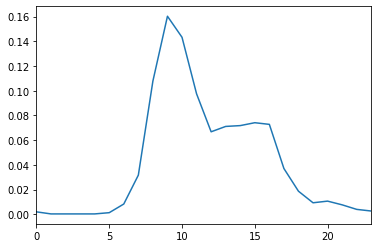

In [138]:
#Display that in a plot using Panda's built-in graphics library
cream_percents.plot();

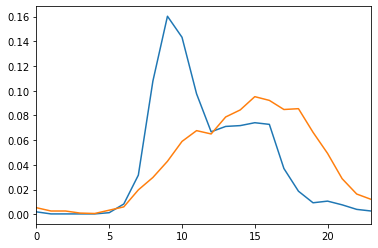

In [139]:
#Display products both together.
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

(froyo['order_hour_of_day']
  .value_counts(normalize=True)
  .sort_index()
  .plot());

2. **crosstab**

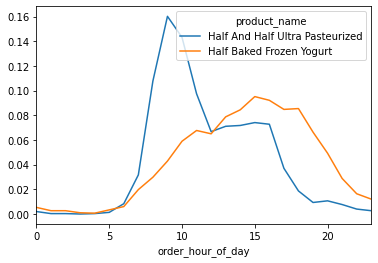

In [140]:
#You can get the same result using the 'pd.crosstab' method
#But it generates a legends and requires fewer steps
pd.crosstab(froyo_cream['order_hour_of_day'],
            froyo_cream['product_name'],
            normalize='columns').plot();

**3. Pivot Table**

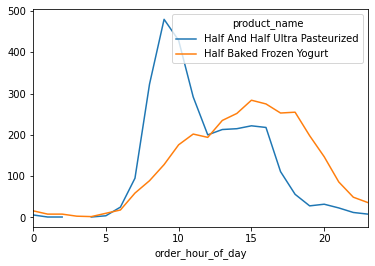

In [141]:
froyo_cream.pivot_table(index='order_hour_of_day',
                        columns='product_name',
                        values='order_id',
                        aggfunc=len).plot();

**4. melt**

In [142]:
#Finally, what if we want to reshape the table?
#First, lets display it in 'wide' format.
wide_table = pd.crosstab(froyo_cream['order_hour_of_day'],
                         froyo_cream['product_name'],
                         normalize=True)

wide_table

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335
5,0.000669,0.001673
6,0.004182,0.003011
7,0.015892,0.009870
8,0.054031,0.014888


In [143]:
#Now let's convert from wide to tidy format.
tidy_table = wide_table.reset_index().melt(id_vars='order_hour_of_day').rename(columns={
    'order_hour_of_day': 'Hour of Day Ordered',
    'product_name': 'Product',
    'value' : 'Percent of Orders by Product'
})

tidy_table

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294


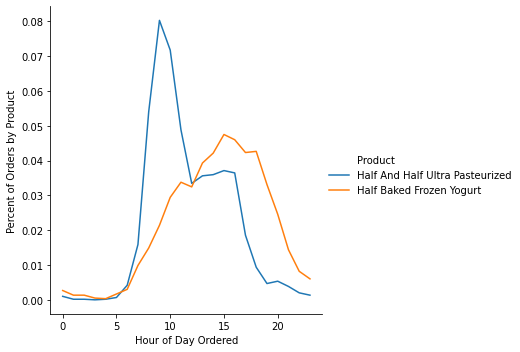

In [144]:
#Display that using the seaborn plotting library.
sns.relplot(x='Hour of Day Ordered',
           y='Percent of Orders by Product',
           hue='Product',
           data=tidy_table,
           kind='line');

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [145]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [146]:
#This is an example of 'wide' format:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


**Table 1 -->Tidy**

In [147]:
#We can use the pandas melt function to reshape Tabe 1 into Tidy format.
#First, get the column names as a list.
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [148]:
#Now get the index values as another list.
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [149]:
#For table 1, convert the index into a column using the 'reset_index' method.
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [150]:
#Convert the table from 'wide' to 'tidy' format using the 'melt' method.
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [151]:
# table2 -> tidy
#First, get the column names as a list.
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [152]:
#Now get the index values as  another list.
table2.index.tolist()

['treatmenta', 'treatmentb']

In [153]:
#For table 2, convert the index into a column using the 'reset_index' method.
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [154]:
#Convert the table from 'wide' to 'tidy' format using the 'melt' method.
twotidy = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
twotidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [155]:
# tidy -> table2
#Do the same thing you did to table 1, but then transpose it when you're finished
twotidy.pivot_table(index='index', columns='variable', values='value').T

index,treatmenta,treatmentb
variable,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


*Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.*

In [0]:
flights = sns.load_dataset('flights')

In [157]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [158]:
# Flights Pivot Table
new_flights = flights.pivot_table(index='year', columns='month', values='passengers')
new_flights

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####